In [55]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model #linear model
import statsmodels.formula.api as smf # linear model with formula
import statsmodels.api as sm
from scipy import stats

In [56]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#Address
path = '/Users/ljn197/Machine_learning/Data/'
file = 'Default.xlsx'

In [58]:
df_raw = pd.read_excel(path+file, index_col=0) # for removing Unnamed:0
df_raw.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


**Scatter Plot**

<IPython.core.display.Javascript object>


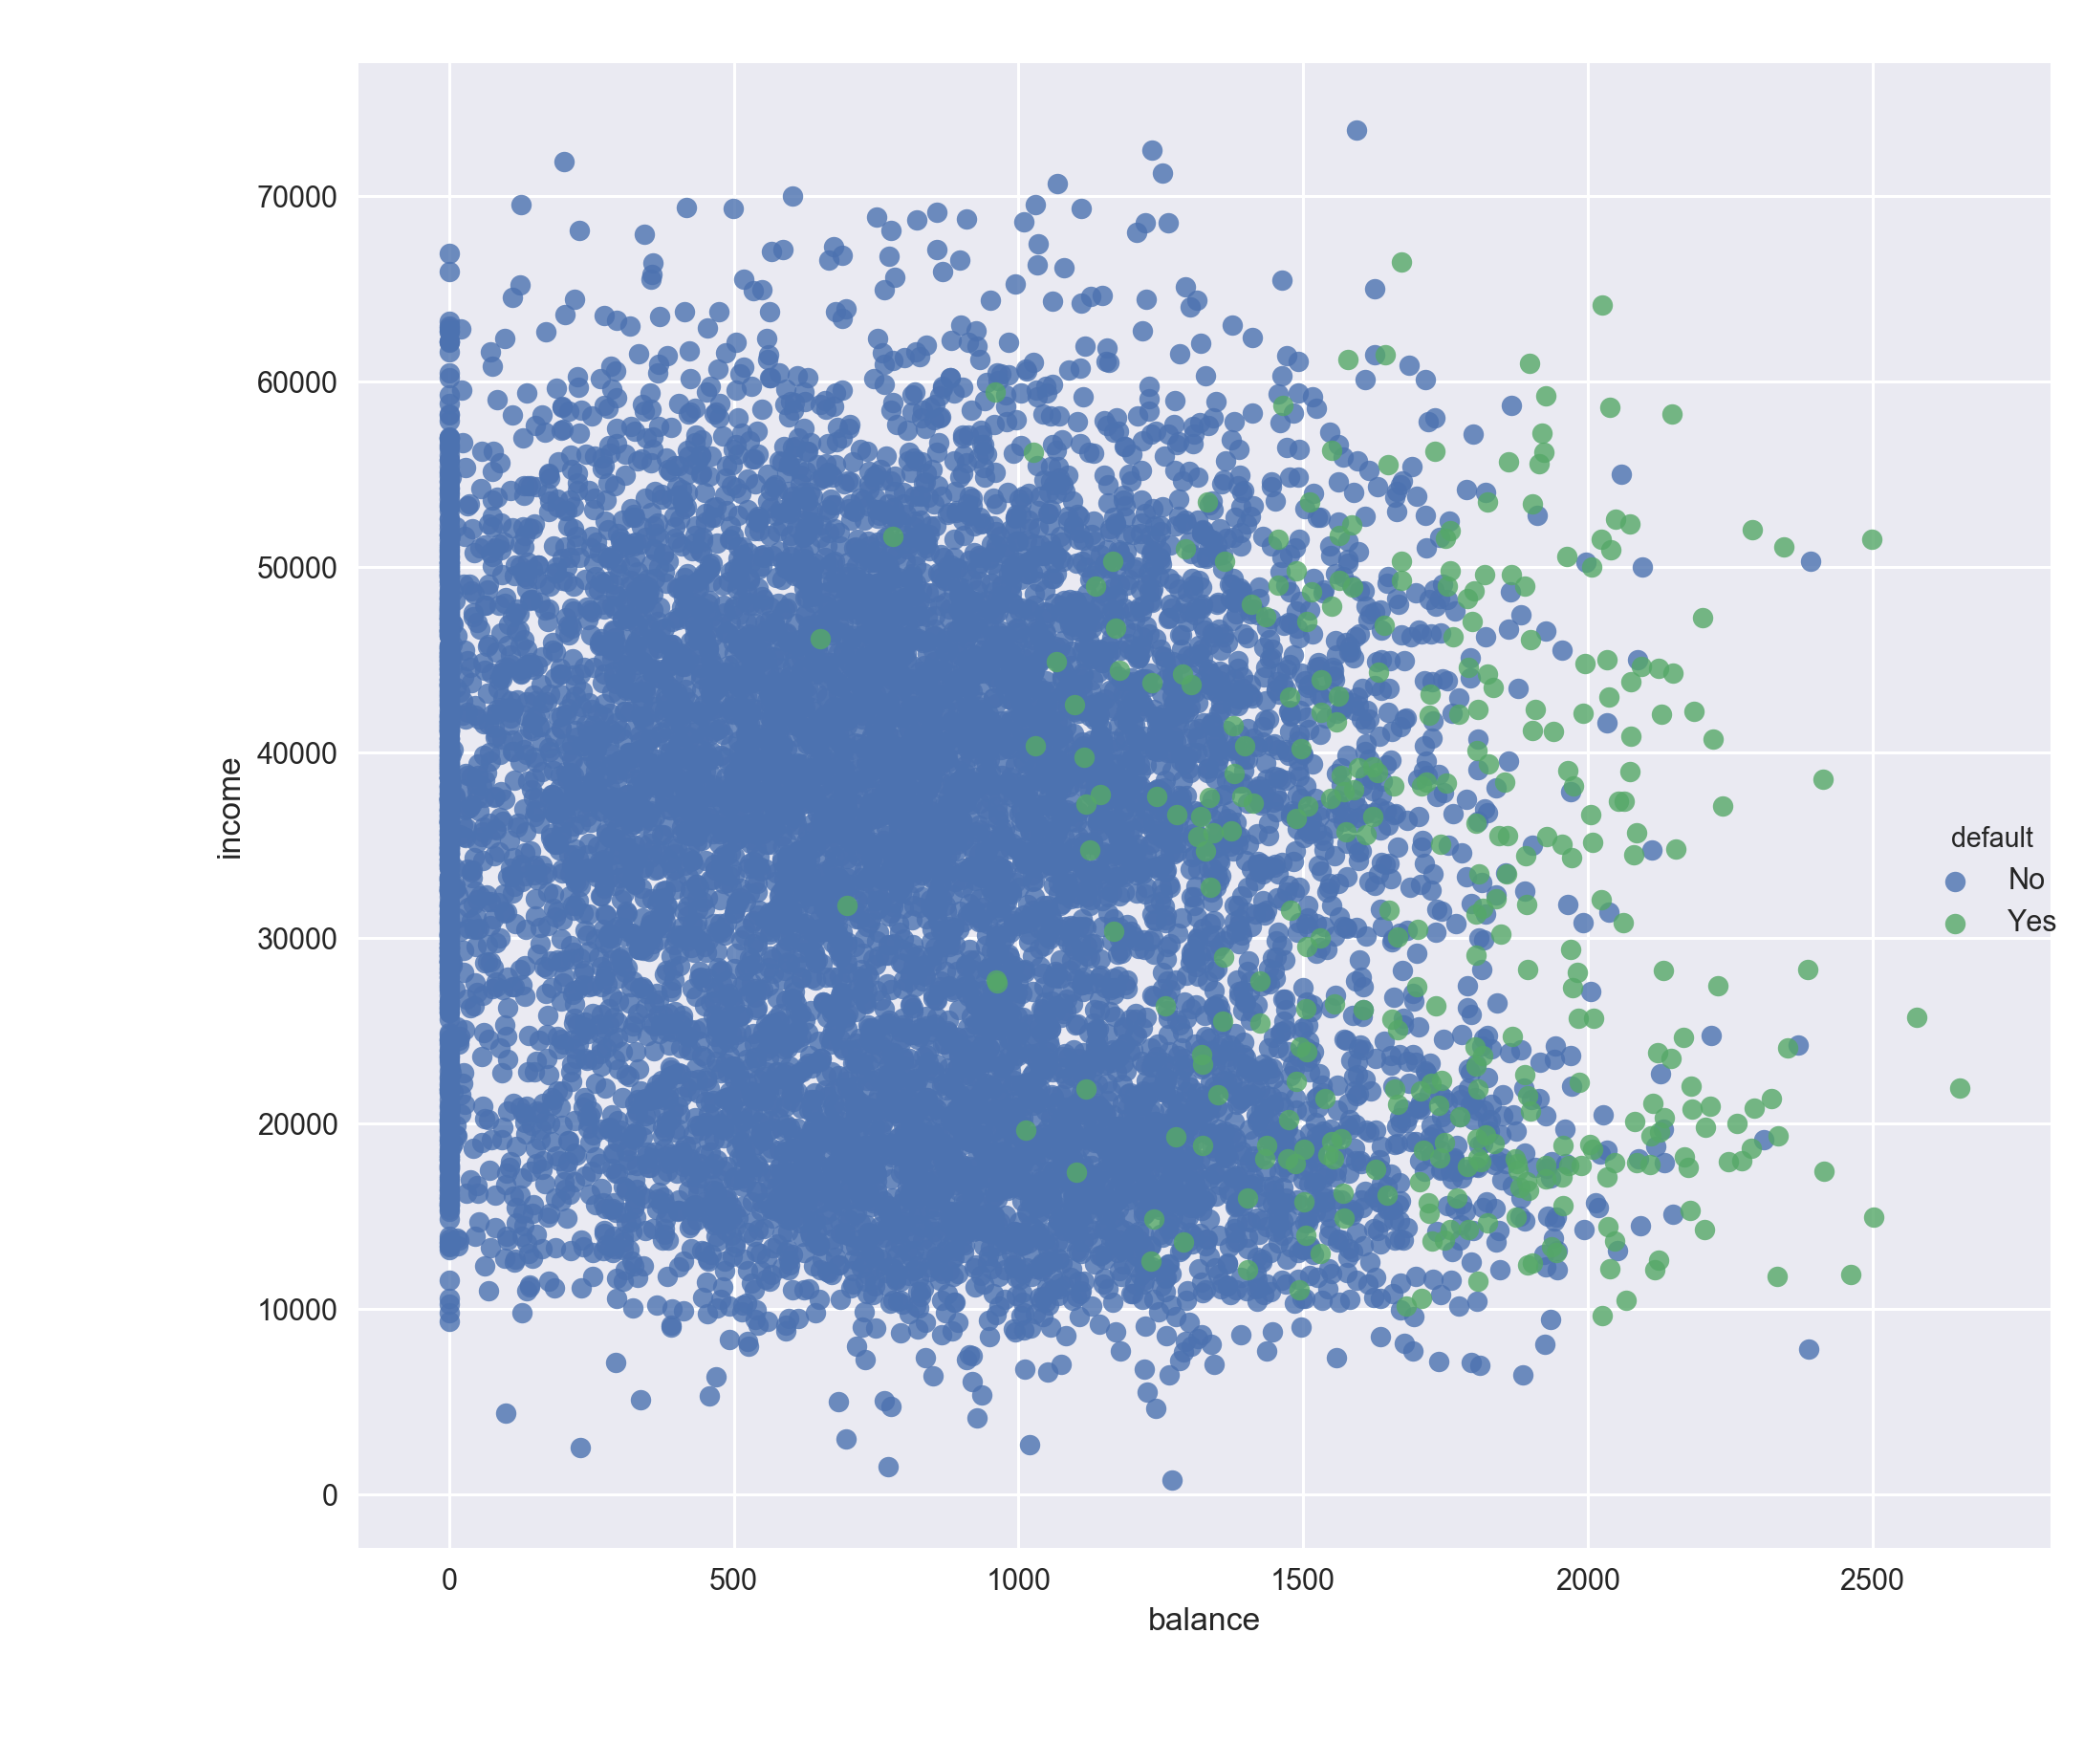

In [61]:
sns.lmplot(x = 'balance',y='income', data=df_raw, hue='default', fit_reg=False)

<IPython.core.display.Javascript object>


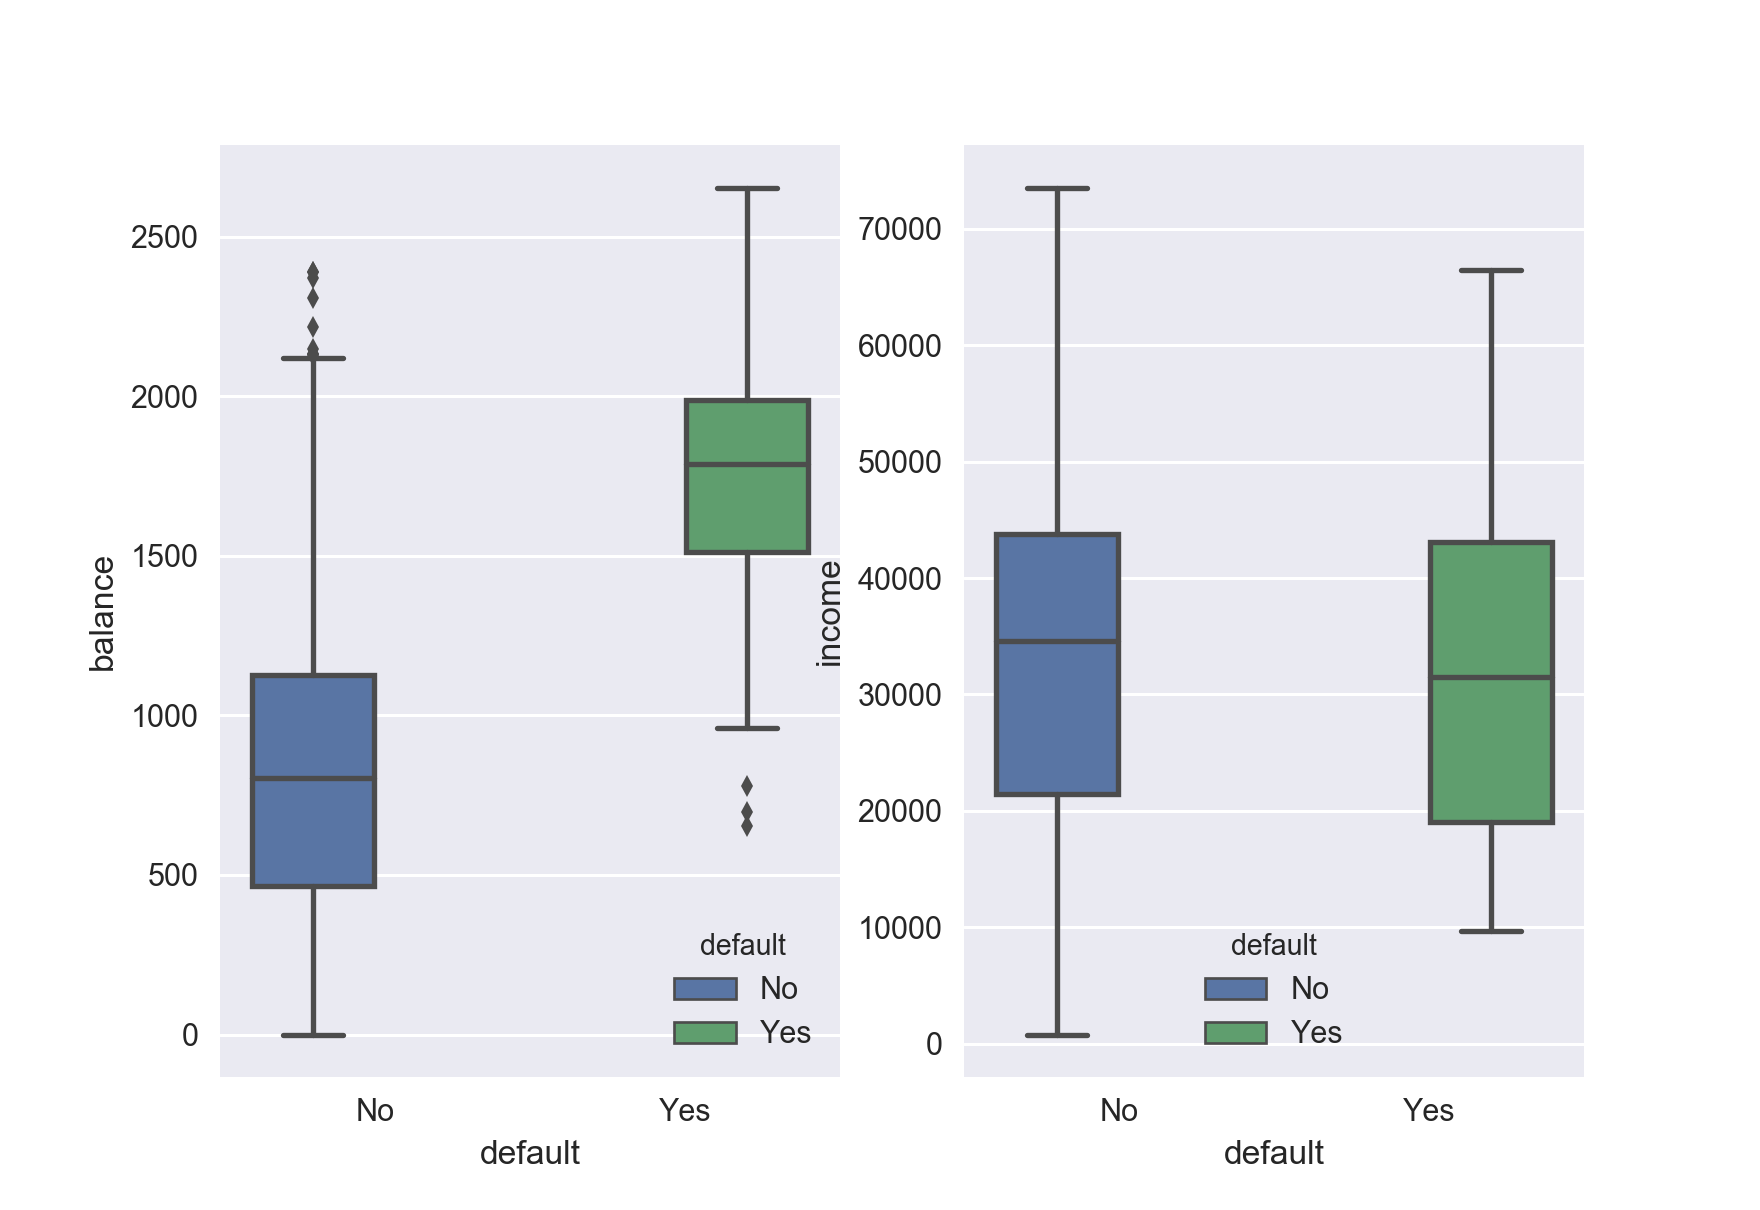

/Users/ljn197/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


In [62]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x = 'default',y='balance', data=df_raw, hue='default', ax=axs[0])
sns.boxplot(x = 'default',y='income', data=df_raw, hue='default', ax=axs[1])

## Logistic Regression

$$\sigma (t) = \frac{e^t}{e^t+1} = \frac{1}{1+e^{-t}}$$

Let us assume that $t$ is a linear function of a single [[dependent and independent variables|explanatory variable]] $x$ (the case where $t$ is a ''linear combination'' of multiple explanatory variables is treated similarly). We can then express $t$ as follows:

$$t = \beta_0 + \beta_1 x$$

And the logistic function can now be written as:

$$p(x) = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}}$$

We can now define the inverse of the logistic function, $g$, the **logit** (log odds):

$$g(p(x)) = \ln \left( \frac{p(x)}{1 - p(x)} \right) = \beta_0 + \beta_1 x $$

$$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1 x}$$

In [63]:
df_raw['y_coded'] = np.where(df_raw['default']=='No',0,1)
df_raw.head()

,default,student,balance,income,y_coded
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


In [64]:
X_raw = df_raw['balance']
y = df_raw['y_coded']

In [65]:
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X_raw)

In [66]:
est = sm.Logit(y, X_with_const).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_coded   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Aug 2018   Pseudo R-squ.:                  0.4534
Time:                        16:12:00   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**using student = Yes**

In [67]:
df_raw['student_coded'] = np.where(df_raw['student']=='No',0,1)

In [68]:
X_raw = df_raw['student_coded']
y = df_raw['y_coded']

In [69]:
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X_raw)

In [70]:
est = sm.Logit(y, X_with_const).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_coded   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Aug 2018   Pseudo R-squ.:                0.004097
Time:                        16:12:08   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student_coded     0.4049      0.115      3.520      0.000       0.179       0.630
=================================================================================
"""

<IPython.core.display.Javascript object>


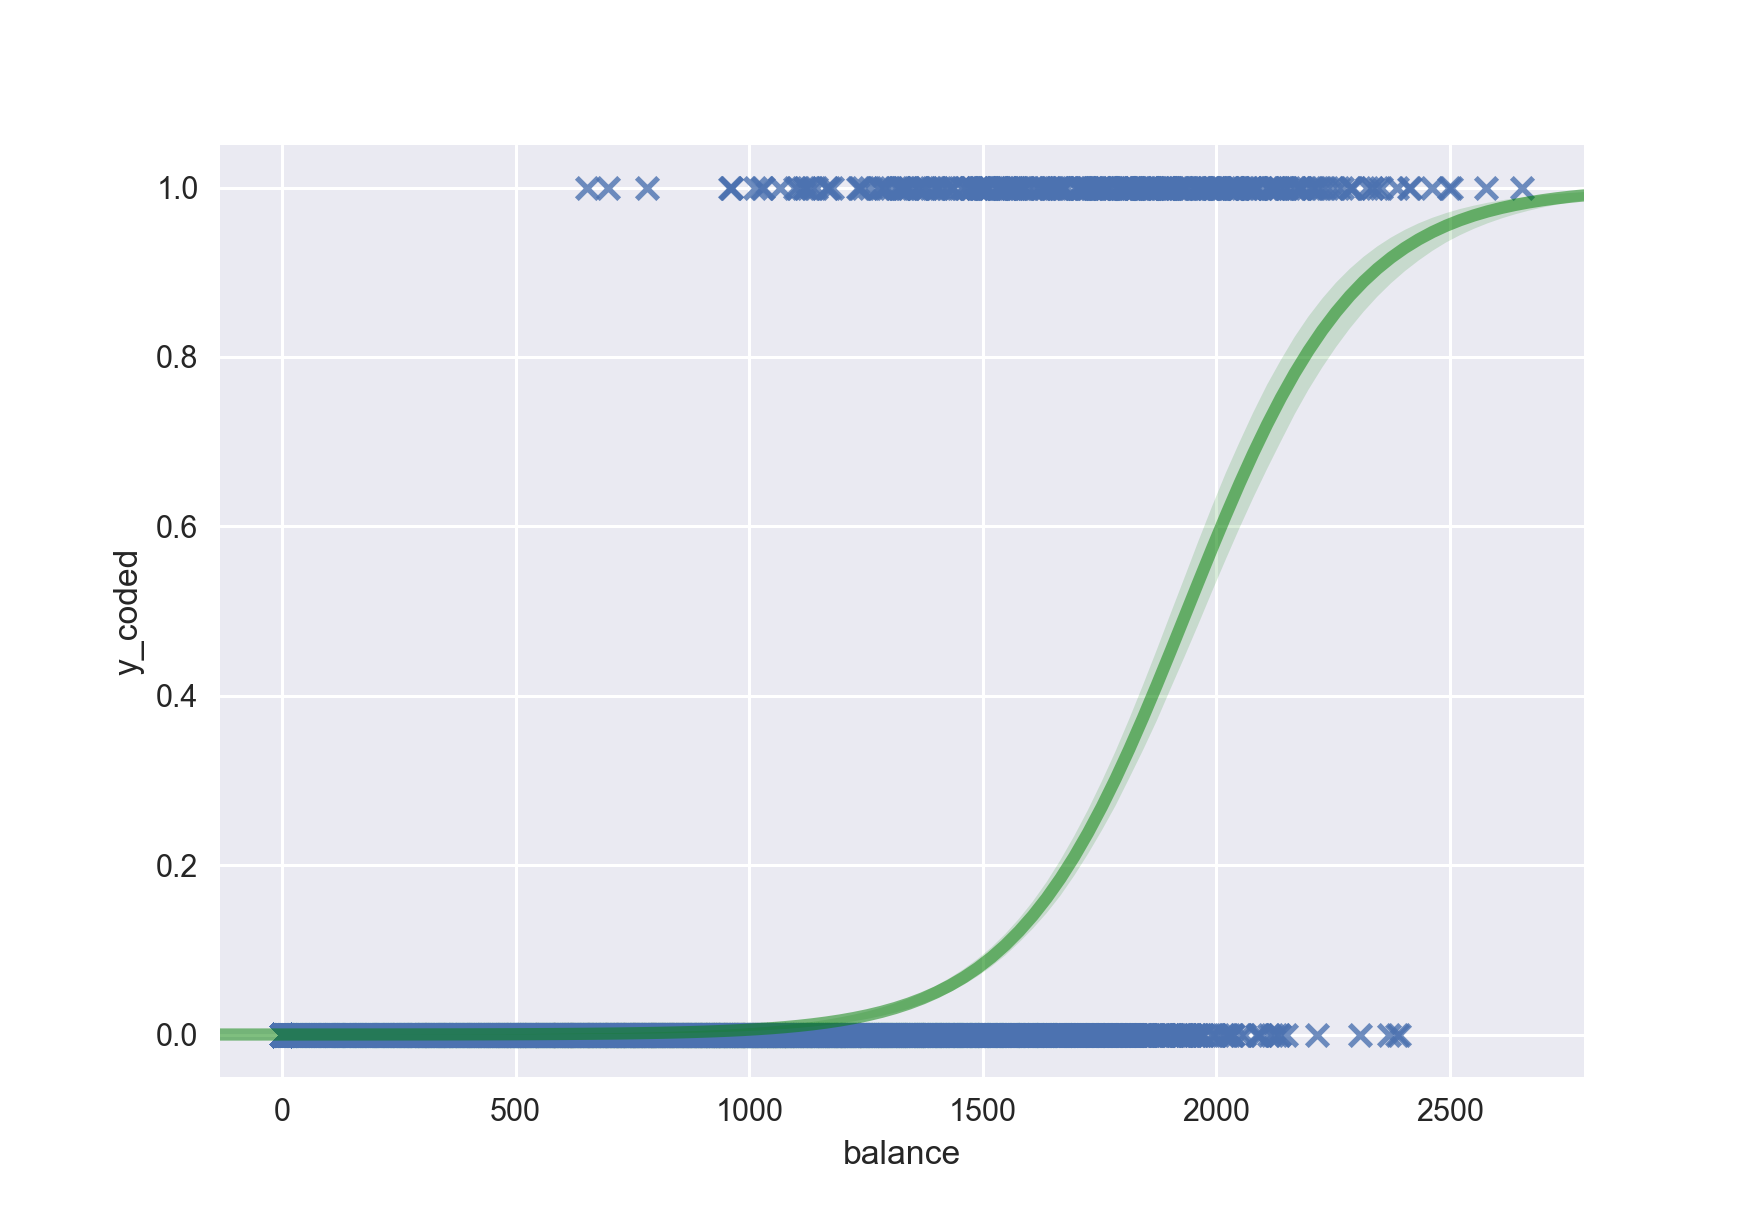

In [71]:
sns.regplot(x='balance', y='y_coded', data=df_raw, line_kws={"color":"g","alpha":0.5,"lw":4},marker="x", logistic=True)

Multi

In [72]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
default          10000 non-null object
student          10000 non-null object
balance          10000 non-null float64
income           10000 non-null float64
y_coded          10000 non-null int64
student_coded    10000 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 866.9+ KB


In [73]:
X_raw = df_raw[['balance','income','student_coded']]
y     = df_raw['y_coded']
X_with_const = sm.add_constant(X_raw)
X_with_const.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
const            10000 non-null float64
balance          10000 non-null float64
income           10000 non-null float64
student_coded    10000 non-null int64
dtypes: float64(3), int64(1)
memory usage: 390.6 KB


In [74]:
est = smf.Logit(y, X_with_const).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_coded   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Aug 2018   Pseudo R-squ.:                  0.4619
Time:                        16:13:02   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance           0.0057      0.000     24.737      0.000       0.005       0.006
income         3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_coded    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
=================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<IPython.core.display.Javascript object>


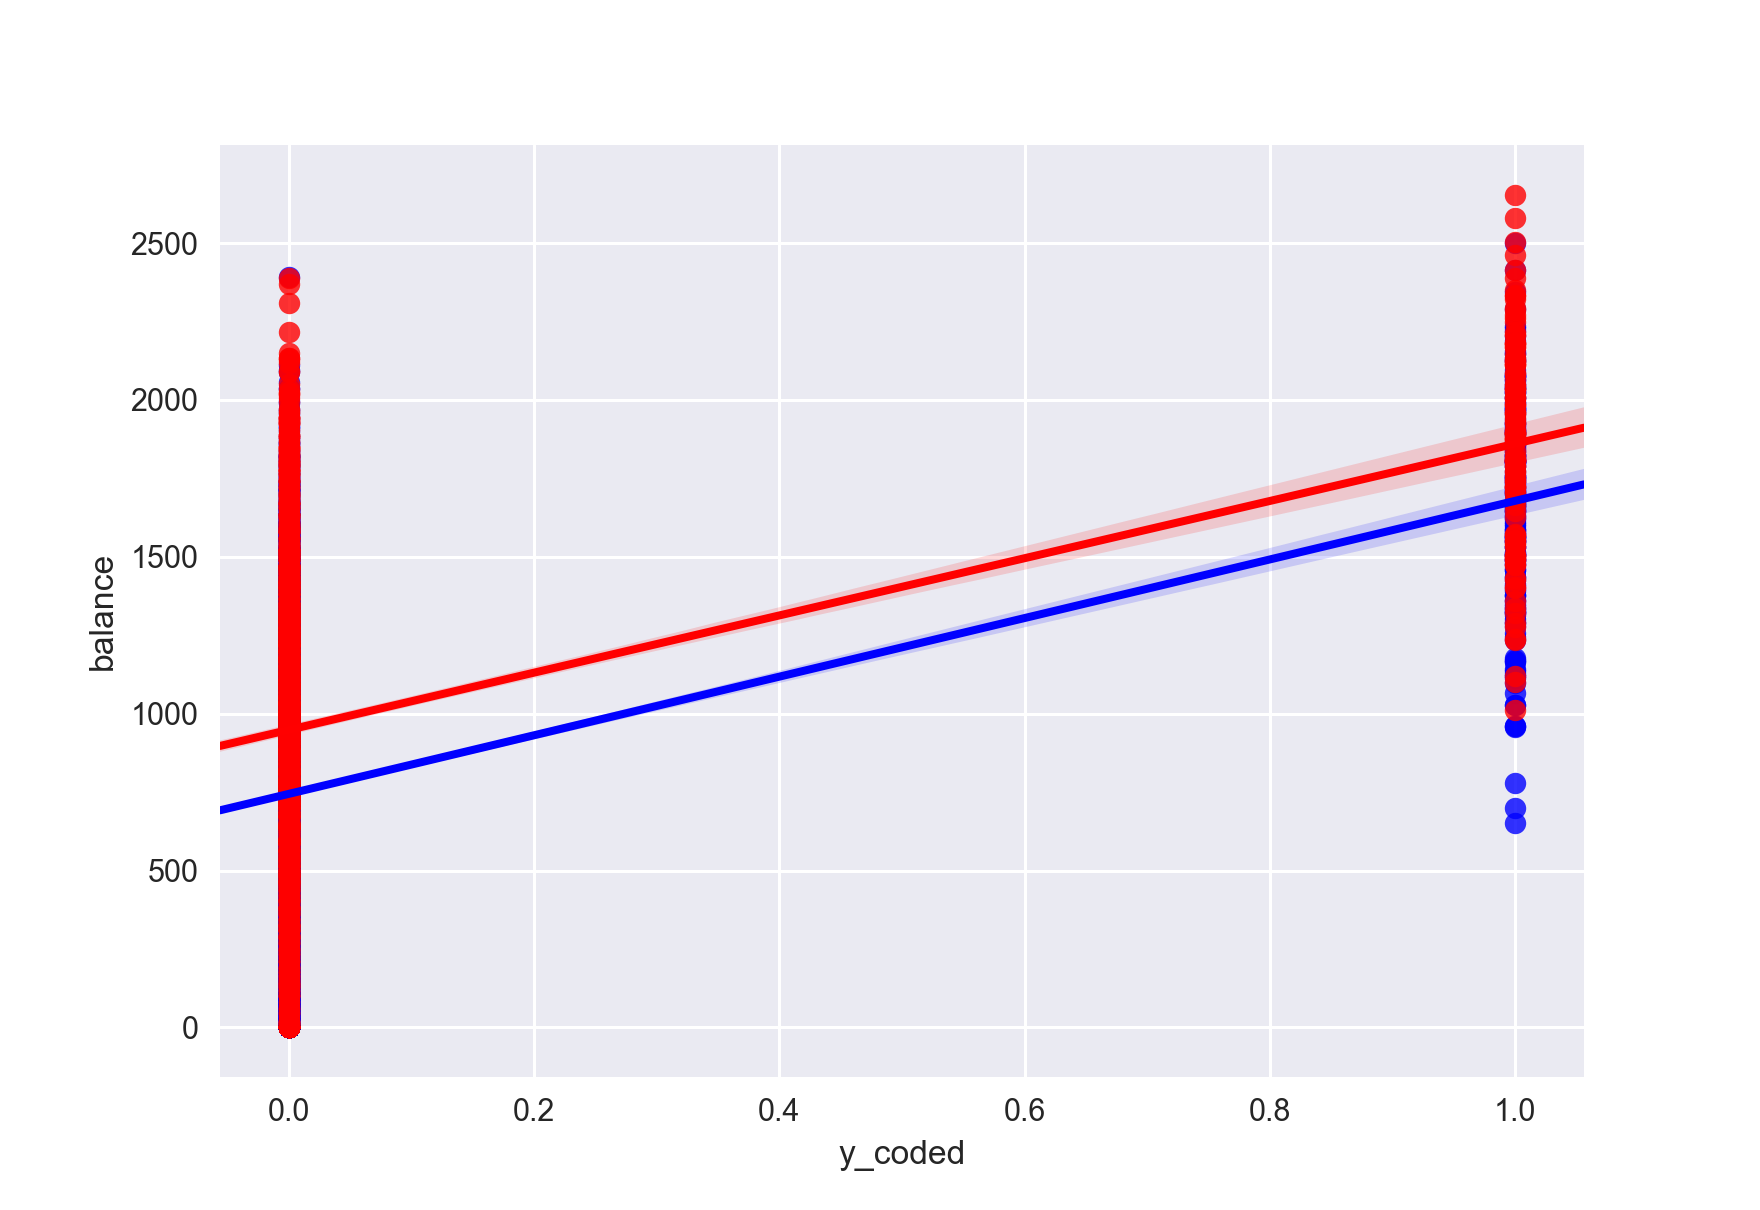

In [75]:
sns.regplot(x = 'y_coded',y='balance', data=df_raw.loc[df_raw.student_coded==0], color='b')
sns.regplot(x = 'y_coded',y='balance', data=df_raw.loc[df_raw.student_coded==1], color='r')

## Ordinary Linear Regression

In [ ]:
X_raw = df_raw['TV']
y = df_raw['sales']

In [ ]:
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X_raw)

In [ ]:
est = sm.OLS(y, X_with_const).fit()
est.summary()

#### Explanation:

**DF Residual** – These are the degrees of freedom associated with the sources of variance.  The total variance has N-1 degrees of freedom.  The model degrees of freedom corresponds to the number of coefficients estimated minus 1.  Including the intercept, there are 2 coefficients, so the model has 2-1=1 degrees of freedom.  The Residual degrees of freedom is the DF total minus the DF model, 199 – 1 =198.

**R-squared** – R-Squared is the proportion of variance in the dependent variable (science) which can be explained by the independent variables (TV).  This is an overall measure of the strength of association and does not reflect the extent to which any particular independent variable is associated with the dependent variable.

**Adj R-squared** – This is an adjustment of the R-squared that penalizes the addition of extraneous predictors to the model. Adjusted R-squared is computed using the below formula where p is the number of predictors.

$$ Adj R^2 = {1-(1-R^2){n-1 \over n-p-1}}$$


**F-statistic** – This is the  is the Mean Square Model divided by the Mean Square Residual, yielding F=312.1.

An F statistic is a value you get when you run an ANOVA test or a regression analysis to find out if the means between two populations are significantly different. It’s similar to a T statistic from a T-Test; A-T test will tell you if a single variable is statistically significant and an F test will tell you if a group of variables are jointly significant.

**Prob (F-statistic)** - This is the p-value associated with the above F-statistic. It is used in testing the null hypothesis that all of the model coefficients are 0.

If you have significant result, it means that your results likely did not happen by chance. If you don’t have statistically significant results, you throw your test data out (as it doesn’t show anything!); in other words, you can’t reject the null hypothesis.

**AIC** - The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

**BIC** - In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

AIC and BIC hold the same interpretation in terms of model comparison. That is, the larger difference in either AIC or BIC indicates stronger evidence for one model over the other (the lower the better).

**t**  – These are the t-statistics used in testing whether a given coefficient is significantly different from zero.

**P>|t|** – This column shows the 2-tailed p-values used in testing the null hypothesis that the coefficient (parameter) is 0. Using an alpha of 0.05:

  - The coefficient for TV is significantly different from 0 because its p-value is 0.000, which is smaller than 0.05. 

  - The constant (const) is significantly different from 0 at the 0.05 alpha level.

**[0.025	0.975]** – These are the 95% confidence intervals for the coefficients.  The confidence intervals are related to the p-values such that the coefficient will not be statistically significant at alpha = .05 if the 95% confidence interval includes zero.  These confidence intervals can help you to put the estimate from the coefficient into perspective by seeing how much the value could vary.

___sourced from: https://stats.idre.ucla.edu/stata/output/regression-analysis-2/ ___

## Multiple Linear Regression

In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. In the case of multiple regression we extend this idea by fitting a  p-dimensional hyperplane to our p predictors.

In [ ]:
X_raw = df_raw[['TV','radio','newspaper']]
y = df_raw['sales']

In [ ]:
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X_raw)

In [ ]:
est = sm.OLS(y, X_with_const).fit()
est.summary()

### Correlation between variables

In [ ]:
df_raw.corr()

### Interaction

Interaction effects can be account for by including a new feature comprising the product of corresponding values from the interacting features:

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1+ \hat{\beta_2}x_2 + \hat{\beta_3}x_1x_2 + \epsilon\,$$

where $x_1$ and $x_2$ are the values of the two features, respectively and $x_1x_2$ represents the interaction between the two. It can be useful to use scikit-learn’s **PolynomialFeatures** to creative interaction terms for all combination of features. 

In [ ]:
X_int = df_raw[['TV','radio','newspaper']]
y = df_raw['sales']

In [ ]:
X_int['TV_radio'] = X_int.TV*X_int.radio
X_int

In [ ]:
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X_int)

In [ ]:
est = sm.OLS(y, X_with_const).fit()
est.summary()

It means $(96.8 - 89.7)/(100 - 89.7) = 69\%$ of variablity of **sale** that remains after fitting the model has been explained by interaction term

### Polynomial

In [ ]:
#Address
path = '/Users/ljn197/Machine_learning/Data/'
file = 'Auto.csv'

In [ ]:
df_raw = pd.read_csv(path+file)
df_raw

In [ ]:
#replacing ? with NaN
df_raw = df_raw.replace('?', np.NaN)

In [ ]:
df_raw['horsepower_c'] = df_raw['horsepower'].astype(np.float)

In [ ]:
sns.lmplot(x = 'horsepower_c',y='mpg', data=df_raw, fit_reg=False)

Creating extra variable to accomodate polynomial:
$$mpg = \beta_0 + \beta_1\times horsepower+ \beta_2 \times horsepower^2 + \epsilon\,$$

In [ ]:
df_raw['horsepower_2'] = df_raw['horsepower_c'].pow(2)


In [ ]:
feed = df_raw[['horsepower_c','horsepower_2','mpg']].dropna()

In [ ]:
X_int = feed[['horsepower_c','horsepower_2']]
y = feed['mpg']

In [ ]:
#adding constant for having intercept in sm
X_with_const = sm.add_constant(X_int)

In [ ]:
est = sm.OLS(y, X_with_const).fit()
est.summary()

In [ ]:
y_pred = est.predict(X_with_const)

In [ ]:
sns.regplot(X_with_const['horsepower_c'], y_pred, fit_reg=False)

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.regplot(X_with_const['horsepower_c'], y_pred, fit_reg=False, ax=axs[0])
sns.regplot(x = 'horsepower_c',y='mpg', data=df_raw, fit_reg=False, ax=axs[1])

In [ ]:
fig, axs = plt.subplots()
sns.regplot(X_with_const['horsepower_c'], y_pred, fit_reg=False, ax=axs)
sns.regplot(x = 'horsepower_c',y='mpg', data=df_raw, fit_reg=False, ax=axs)

### Regression with Scikit-learn

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_int, y)

# Make predictions using the testing set
y_pred_scikit = regr.predict(X_int) #scikit learn doesn't need the adding of constant

In [ ]:
type(y_pred_scikit)

In [ ]:
fig, axs = plt.subplots()
sns.regplot(X_int['horsepower_c'], y, fit_reg=False, ax=axs)
sns.regplot(x = X_int['horsepower_c'].values ,y=y_pred_scikit, fit_reg=True, order=2, scatter = True, ax=axs)

### comparing results

In [ ]:
df_comp = pd.DataFrame(data =[X_int.horsepower_c.values, y_pred, y_pred_scikit.tolist()],index=['horsepower','Statsmodel','Scikit'])
df_comp

In [ ]:
#Residual
est.fittedvalues

The most useful way to plot the residuals, though, is with your predicted values on the x-axis, and your residuals on the y-axis.

In [ ]:
sns.residplot(x = y_pred, y= est.resid_pearson, lowess=True, color="y")

In [ ]:
sns.regplot(y_pred_scikit, y_pred_scikit-y, color='b',label='Residual Plot')

In [ ]:
est.mse_total

In [ ]:
#Sum of squared (whitened) residuals.
est.ssr

In [ ]:
#Explained sum of squares
est.ess

In [ ]:
#Uncentered sum of squares. Sum of the squared values of the (whitened) endogenous response variable.
est.uncentered_tss

In [ ]:
#The total (weighted) sum of squares centered about the mean.
est.centered_tss

In [ ]:
#Total mean squared error. Defined as the uncentered total sum of squares divided by n the number of observations.
est.mse_total

In [ ]:
#Mean squared error the model. This is the explained sum of squares divided by the model degrees of freedom.
est.mse_model

In [ ]:
#Mean squared error of the residuals. The sum of squared residuals divided by the residual degrees of freedom.
est.mse_resid

In [ ]:
est.resid_pearson # Residuals, normalized to have unit variance.